In [10]:
#http://cs231n.github.io/classification/
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [13]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

('Training data shape: ', (50000, 32, 32, 3))
('Training labels shape: ', (50000,))
('Test data shape: ', (10000, 32, 32, 3))
('Test labels shape: ', (10000,))


In [14]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
batch1=np.empty(0,int)#=[]
batch2=np.empty(0,int)#=[]
batch3=np.empty(0,int)#=[]

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 1000
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)  
 #   idxs=idxs[:1000]
    batch1= np.concatenate([batch1,idxs[:333]]) #containing indicies only
    batch2= np.concatenate([batch2,idxs[333:666]]) #containing indicies only
    batch3= np.concatenate([batch3,idxs[666:999]]) #containing indicies only
#print ('all elements: ', batch3.shape)
np.random.shuffle(batch1)
np.random.shuffle(batch2)
np.random.shuffle(batch3)

b1X= X_train[batch1]
b1Y= y_train[batch1]
b2X= X_train[batch2]
b2Y= y_train[batch2]
b3X= X_train[batch3]
b3Y= y_train[batch3]
print ('Xs: ', b1X.shape)
print ('Ys: ', b1Y.shape)
#X_train, y_train = shuffle_arrays_unison(arrays=[X_train, y_train], random_seed=3)
 
    
    # idxs = np.random.choice(idxs, samples_per_class, replace=False)
    #   for i, idx in enumerate(idxs):
    #   plt_idx = i * num_classes + y + 1
    #   plt.subplot(samples_per_class, num_classes, plt_idx)
    #   plt.imshow(X_train[idx].astype('uint8'))
    #   plt.axis('off')
    #   if i == 0:
    #       plt.title(cls)
#plt.show()

('Xs: ', (3330, 32, 32, 3))
('Ys: ', (3330,))


In [15]:
# Subsample the data for more efficient code execution in this exercise
#num_training = 1000
#mask = range(num_training)
#X_train = X_train[mask]
#y_train = y_train[mask] 

num_test = 3330
num_test_2 = 9990
#mask = range(num_test)
#X_test = X_test[mask]
#y_test = y_test[mask]

In [16]:
# Reshape the image data into rows
b1X = np.reshape(b1X, (b1X.shape[0], -1))
b2X = np.reshape(b2X, (b2X.shape[0], -1))
b3X = np.reshape(b3X, (b3X.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print (b1X.shape,b2X.shape,b3X.shape, X_test.shape)

((3330, 3072), (3330, 3072), (3330, 3072), (10000, 3072))


In [8]:
import NearestNeighbor as NN
# Create a NN classifier instance and train it with training data
best=0
bestk=0
allav=[ ]  
k=[]
deviations=[]

for i in range(6, 21,1):
             
    print 'for k=', i
    av=0
    devcal=[]
    classifier = NN.NearestNeighbor() 
    # FIRST ROUND
    alltrainX= np.concatenate([b1X,b2X])
    alltrainY= np.concatenate([b1Y,b2Y])
    classifier.train(alltrainX, alltrainY)
    # Predict the labels of testing data
   # print i
    y_test_pred = classifier.predict(b3X,i, 'L1')
    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == b3Y)
    accuracy = float(num_correct) / num_test
    print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
    av=av+accuracy
    devcal.append(accuracy)

    # SECOND ROUND
    alltrainX= np.concatenate([b1X,b3X])
    alltrainY= np.concatenate([b1Y,b3Y])
    classifier.train(alltrainX, alltrainY)
    # Predict the labels of testing data
    y_test_pred = classifier.predict(b2X,i, 'L1')
    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == b2Y)
    accuracy = float(num_correct) / num_test
    print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
    av=av+accuracy
    devcal.append(accuracy)


    # THIRD ROUND
    alltrainX= np.concatenate([b2X,b3X])
    alltrainY= np.concatenate([b2Y,b3Y])
    classifier.train(alltrainX, alltrainY)
    # Predict the labels of testing data
    y_test_pred = classifier.predict(b1X,i, 'L1')
    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == b1Y)
    accuracy = float(num_correct) / num_test
    print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
    av=av+accuracy
    devcal.append(accuracy)

    av=av/3
    print 'average accuracy: ',av
    allav.append(av)

        
    if(av>best):
        best=av
        bestk=i
   
    k.append(i)
    deviations.append(np.std(devcal))# has all the standard deviations by the end
 #   print (devcal)

#print 'best k: ', bestk, "  value: ", best




for k= 6
Got 993 / 3330 correct => accuracy: 0.298198
Got 1061 / 3330 correct => accuracy: 0.318619
Got 1086 / 3330 correct => accuracy: 0.326126
average accuracy:  0.314314314314
for k= 7
Got 1000 / 3330 correct => accuracy: 0.300300
Got 1058 / 3330 correct => accuracy: 0.317718
Got 1077 / 3330 correct => accuracy: 0.323423
average accuracy:  0.313813813814
for k= 8
Got 987 / 3330 correct => accuracy: 0.296396
Got 1055 / 3330 correct => accuracy: 0.316817
Got 1081 / 3330 correct => accuracy: 0.324625
average accuracy:  0.312612612613
for k= 9
Got 1008 / 3330 correct => accuracy: 0.302703
Got 1066 / 3330 correct => accuracy: 0.320120
Got 1075 / 3330 correct => accuracy: 0.322823
average accuracy:  0.315215215215
for k= 10
Got 1005 / 3330 correct => accuracy: 0.301802
Got 1057 / 3330 correct => accuracy: 0.317417
Got 1070 / 3330 correct => accuracy: 0.321321
average accuracy:  0.313513513514
for k= 11
Got 1005 / 3330 correct => accuracy: 0.301802
Got 1059 / 3330 correct => accuracy: 0.3

best k:  9   value:  0.315215215215


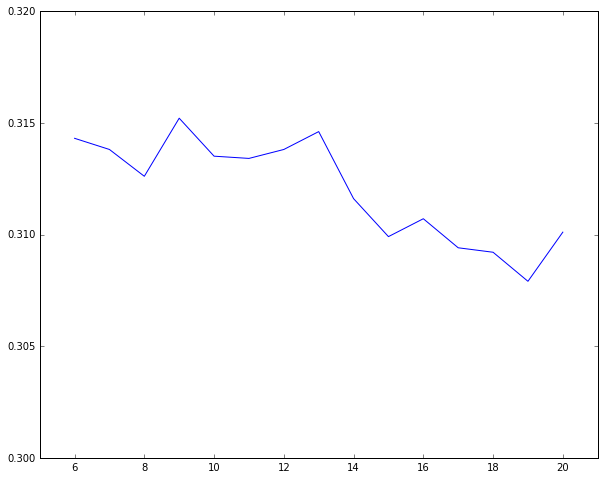

In [13]:
#dev=np.array[np.mean(j) for k]
print 'best k: ', bestk, "  value: ", best
plt.plot(k,allav,'-')
plt.axis([5,21,0.30,0.32])
plt.show()

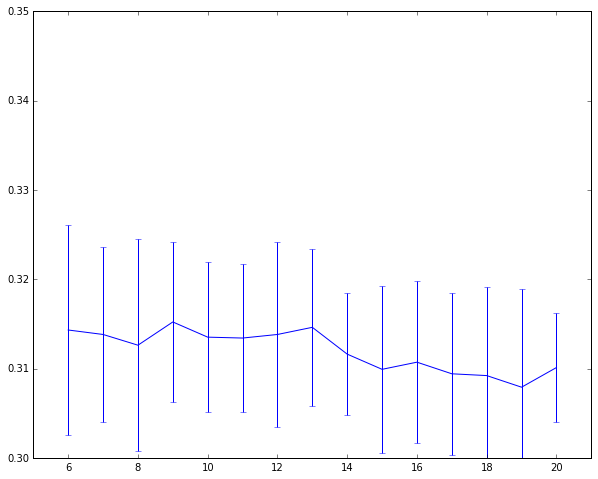

In [20]:
plt.errorbar(k, allav, yerr=deviations)
plt.axis([5,21,0.30,0.35])
plt.show()    

In [17]:
import NearestNeighbor as NN
classifier = NN.NearestNeighbor() 
aalltrainX= np.concatenate([b1X,b2X])
aalltrainX= np.concatenate([aalltrainX,b3X])
aalltrainY= np.concatenate([b1Y,b2Y])
aalltrainY= np.concatenate([aalltrainY,b3Y])
print (aalltrainX.shape, X_test.shape)
classifier.train(aalltrainX, aalltrainY)
 #redict the labels of testing data
y_test_pred = classifier.predict(X_test,9, 'L1')
 #ompute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test_2
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


((9990, 3072), (10000, 3072))
Got 3241 / 9990 correct => accuracy: 0.324424


In [29]:
for i in range (10): 
    sum_correct= np.sum(y_test_pred[x] == y_test[x] and y_test_pred[x]==i for x in range (X_test.shape[0]))
    acc=(float(sum_correct)/1000)
    print (' CCRn is:  %f  for class: %s' % (acc, classes[i]))

 CCRn is:  0.542000  for class: plane
 CCRn is:  0.166000  for class: car
 CCRn is:  0.443000  for class: bird
 CCRn is:  0.144000  for class: cat
 CCRn is:  0.422000  for class: deer
 CCRn is:  0.191000  for class: dog
 CCRn is:  0.271000  for class: frog
 CCRn is:  0.197000  for class: horse
 CCRn is:  0.657000  for class: ship
 CCRn is:  0.208000  for class: truck
